<a href="https://colab.research.google.com/github/lotrmay/TensorFlow_Learning/blob/master/bc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from __future__ import absolute_import, division, print_function, unicode_literals
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import pickle

import numpy as np #better arrays in python, lepší práce s multidimenzionálními poli
import pandas as pd #data analytics tool, lepší manipulace s daty, dokáže například cut outnout column
import matplotlib.pyplot as plt #vizualizace tabulek a grafů
from IPython.display import clear_output #jen pro tenhle notebook
from six.moves import urllib
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import utils as np_utils
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import keras

CSV_COLUMN_NAMES2=['Odds_firstTeam','Odds_secondTeam','Rank_firstTeam','Rank_secondTeam','WinRate_firstTeam','WinRate_secondTeam','PistolWinRate_firstTeam','PistolWinRate_secondTeam',
                  'playerAARating','playerAADpr','playerAAKast','playerAAImpact','playerAAAdr','playerAAKpr','playerAAHs','playerAAKD','playerAAGrenadeDmg',
                  'playerABRating','playerABDpr','playerABKast','playerABImpact','playerABAdr','playerABKpr','playerABHs','playerABKD','playerABGrenadeDmg',
                  'playerACRating','playerACDpr','playerACKast','playerACImpact','playerACAdr','playerACKpr','playerACHs','playerACKD','playerACGrenadeDmg',
                  'playerADRating','playerADDpr','playerADKast','playerADImpact','playerADAdr','playerADKpr','playerADHs','playerADKD','playerADGrenadeDmg',
                  'playerAERating','playerAEDpr','playerAEKast','playerAEImpact','playerAEAdr','playerAEKpr','playerAEHs','playerAEKD','playerAEGrenadeDmg',
                  'playerBARating','playerBADpr','playerBAKast','playerBAImpact','playerBAAdr','playerBAKpr','playerBAHs','playerBAKD','playerBAGrenadeDmg',
                  'playerBBRating','playerBBDpr','playerBBKast','playerBBImpact','playerBBAdr','playerBBKpr','playerBBHs','playerBBKD','playerBBGrenadeDmg',
                  'playerBCRating','playerBCDpr','playerBCKast','playerBCImpact','playerBCAdr','playerBCKpr','playerBCHs','playerBCKD','playerBCGrenadeDmg',
                  'playerBDRating','playerBDDpr','playerBDKast','playerBDImpact','playerBDAdr','playerBDKpr','playerBDHs','playerBDKD','playerBDGrenadeDmg',
                  'playerBERating','playerBEDpr','playerBEKast','playerBEImpact','playerBEAdr','playerBEKpr','playerBEHs','playerBEKD','playerBEGrenadeDmg']




(18930, 102)
(17037, 98)
(12778, 98)
(1704, 98)
(2555, 98)
Epoch 1/500
200/200 [==============================] - 1s 3ms/step - loss: 0.7636 - binary_accuracy: 0.5308 - val_loss: 0.6649 - val_binary_accuracy: 0.5926
Epoch 2/500
200/200 [==============================] - 0s 2ms/step - loss: 0.6996 - binary_accuracy: 0.5581 - val_loss: 0.6602 - val_binary_accuracy: 0.6074
Epoch 3/500
200/200 [==============================] - 0s 2ms/step - loss: 0.6800 - binary_accuracy: 0.5696 - val_loss: 0.6567 - val_binary_accuracy: 0.6133
Epoch 4/500
200/200 [==============================] - 0s 2ms/step - loss: 0.6749 - binary_accuracy: 0.5774 - val_loss: 0.6552 - val_binary_accuracy: 0.6211
Epoch 5/500
200/200 [==============================] - 0s 2ms/step - loss: 0.6643 - binary_accuracy: 0.5925 - val_loss: 0.6528 - val_binary_accuracy: 0.6227
Epoch 6/500
200/200 [==============================] - 0s 2ms/step - loss: 0.6674 - binary_accuracy: 0.5876 - val_loss: 0.6514 - val_binary_accuracy: 0.6254

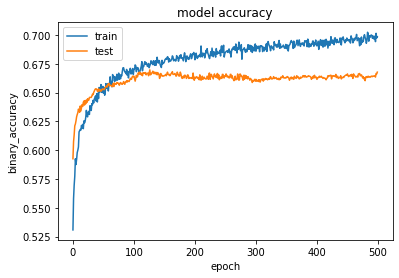

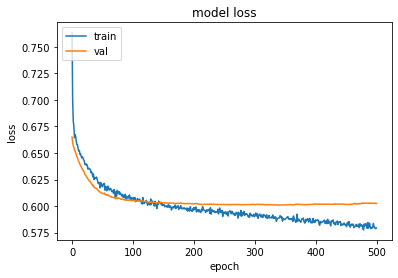

In [37]:
%tensorflow_version 2.x
import tensorflow as tf
from __future__ import absolute_import, division, print_function, unicode_literals
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import pickle

import numpy as np #better arrays in python, lepší práce s multidimenzionálními poli
import pandas as pd #data analytics tool, lepší manipulace s daty, dokáže například cut outnout column
import matplotlib.pyplot as plt #vizualizace tabulek a grafů
from IPython.display import clear_output #jen pro tenhle notebook
from six.moves import urllib
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import utils as np_utils
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import keras


#CSV_COLUMN_NAMES označuje nadpisy sloupců v csv soubour
CSV_COLUMN_NAMES=['Odds_firstTeam','Odds_secondTeam','Rank_firstTeam','Rank_secondTeam','WinRate_firstTeam','WinRate_secondTeam','PistolWinRate_firstTeam','PistolWinRate_secondTeam',
                  'playerAARating','playerAADpr','playerAAKast','playerAAImpact','playerAAAdr','playerAAKpr','playerAAHs','playerAAKD','playerAAGrenadeDmg',
                  'playerABRating','playerABDpr','playerABKast','playerABImpact','playerABAdr','playerABKpr','playerABHs','playerABKD','playerABGrenadeDmg',
                  'playerACRating','playerACDpr','playerACKast','playerACImpact','playerACAdr','playerACKpr','playerACHs','playerACKD','playerACGrenadeDmg',
                  'playerADRating','playerADDpr','playerADKast','playerADImpact','playerADAdr','playerADKpr','playerADHs','playerADKD','playerADGrenadeDmg',
                  'playerAERating','playerAEDpr','playerAEKast','playerAEImpact','playerAEAdr','playerAEKpr','playerAEHs','playerAEKD','playerAEGrenadeDmg',
                  'playerBARating','playerBADpr','playerBAKast','playerBAImpact','playerBAAdr','playerBAKpr','playerBAHs','playerBAKD','playerBAGrenadeDmg',
                  'playerBBRating','playerBBDpr','playerBBKast','playerBBImpact','playerBBAdr','playerBBKpr','playerBBHs','playerBBKD','playerBBGrenadeDmg',
                  'playerBCRating','playerBCDpr','playerBCKast','playerBCImpact','playerBCAdr','playerBCKpr','playerBCHs','playerBCKD','playerBCGrenadeDmg',
                  'playerBDRating','playerBDDpr','playerBDKast','playerBDImpact','playerBDAdr','playerBDKpr','playerBDHs','playerBDKD','playerBDGrenadeDmg',
                  'playerBERating','playerBEDpr','playerBEKast','playerBEImpact','playerBEAdr','playerBEKpr','playerBEHs','playerBEKD','playerBEGrenadeDmg','Match_link','Result','team_one_name','team_two_name']
CSV_COLUMN_NAMES2=['Odds_firstTeam','Odds_secondTeam','Rank_firstTeam','Rank_secondTeam','WinRate_firstTeam','WinRate_secondTeam','PistolWinRate_firstTeam','PistolWinRate_secondTeam',
                  'playerAARating','playerAADpr','playerAAKast','playerAAImpact','playerAAAdr','playerAAKpr','playerAAHs','playerAAKD','playerAAGrenadeDmg',
                  'playerABRating','playerABDpr','playerABKast','playerABImpact','playerABAdr','playerABKpr','playerABHs','playerABKD','playerABGrenadeDmg',
                  'playerACRating','playerACDpr','playerACKast','playerACImpact','playerACAdr','playerACKpr','playerACHs','playerACKD','playerACGrenadeDmg',
                  'playerADRating','playerADDpr','playerADKast','playerADImpact','playerADAdr','playerADKpr','playerADHs','playerADKD','playerADGrenadeDmg',
                  'playerAERating','playerAEDpr','playerAEKast','playerAEImpact','playerAEAdr','playerAEKpr','playerAEHs','playerAEKD','playerAEGrenadeDmg',
                  'playerBARating','playerBADpr','playerBAKast','playerBAImpact','playerBAAdr','playerBAKpr','playerBAHs','playerBAKD','playerBAGrenadeDmg',
                  'playerBBRating','playerBBDpr','playerBBKast','playerBBImpact','playerBBAdr','playerBBKpr','playerBBHs','playerBBKD','playerBBGrenadeDmg',
                  'playerBCRating','playerBCDpr','playerBCKast','playerBCImpact','playerBCAdr','playerBCKpr','playerBCHs','playerBCKD','playerBCGrenadeDmg',
                  'playerBDRating','playerBDDpr','playerBDKast','playerBDImpact','playerBDAdr','playerBDKpr','playerBDHs','playerBDKD','playerBDGrenadeDmg',
                  'playerBERating','playerBEDpr','playerBEKast','playerBEImpact','playerBEAdr','playerBEKpr','playerBEHs','playerBEKD','playerBEGrenadeDmg']



train=pd.read_csv('/content/pokus.csv',sep=";",names=CSV_COLUMN_NAMES,error_bad_lines=False,header=None)#vytvoří dataframe z našeho csv souboru
print(train.shape)#vypíše nám dimenzionalitu našeho dataframu (2, 3) 2 řádky 3 sloupce

#následující 2 řádky nám upraví dva sloupce z textových na číselné formáty (category datatype)
train['team_one_name']=pd.Categorical(train['team_one_name']).codes #sníží využití paměti z 1.2MB na 0.03 MB viz: https://towardsdatascience.com/staying-sane-while-adopting-pandas-categorical-datatypes-78dbd19dcd8a
train['team_two_name']=pd.Categorical(train['team_two_name']).codes

#Odstraním z dataframu následující sloupce (odkaz na zápas a jména týmů), jelikož jsem je využíval pouze při sběru dat
train.pop('Match_link')
train.pop('team_one_name')
train.pop('team_two_name')
#https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
#frac=1 znamená, vrať všechny řádky
train = train.sample(frac=1).reset_index(drop=True)

'''
train.pop('playerAAGrenadeDmg')
train.pop('playerABGrenadeDmg')
train.pop('playerACGrenadeDmg')
train.pop('playerADGrenadeDmg')
train.pop('playerAEGrenadeDmg')
train.pop('playerBAGrenadeDmg')
train.pop('playerBBGrenadeDmg')
train.pop('playerBCGrenadeDmg')
train.pop('playerBDGrenadeDmg')
train.pop('playerBEGrenadeDmg')

train.pop('playerAAKast')
train.pop('playerABKast')
train.pop('playerACKast')
train.pop('playerADKast')
train.pop('playerAEKast')
train.pop('playerBAKast')
train.pop('playerBBKast')
train.pop('playerBCKast')
train.pop('playerBDKast')
train.pop('playerBEKast')

train.pop('playerAAKD')
train.pop('playerABKD')
train.pop('playerACKD')
train.pop('playerADKD')
train.pop('playerAEKD')
train.pop('playerBAKD')
train.pop('playerBBKD')
train.pop('playerBCKD')
train.pop('playerBDKD')
train.pop('playerBEKD')

train.pop('playerAAAdr')
train.pop('playerABAdr')
train.pop('playerACAdr')
train.pop('playerADAdr')
train.pop('playerAEAdr')
train.pop('playerBAAdr')
train.pop('playerBBAdr')
train.pop('playerBCAdr')
train.pop('playerBDAdr')
train.pop('playerBEAdr')

train.pop('playerAADpr')
train.pop('playerABDpr')
train.pop('playerACDpr')
train.pop('playerADDpr')
train.pop('playerAEDpr')
train.pop('playerBADpr')
train.pop('playerBBDpr')
train.pop('playerBCDpr')
train.pop('playerBDDpr')
train.pop('playerBEDpr')

train.pop('playerAAKpr')
train.pop('playerABKpr')
train.pop('playerACKpr')
train.pop('playerADKpr')
train.pop('playerAEKpr')
train.pop('playerBAKpr')
train.pop('playerBBKpr')
train.pop('playerBCKpr')
train.pop('playerBDKpr')
train.pop('playerBEKpr')

train.pop('playerAAImpact')
train.pop('playerABImpact')
train.pop('playerACImpact')
train.pop('playerADImpact')
train.pop('playerAEImpact')
train.pop('playerBAImpact')
train.pop('playerBBImpact')
train.pop('playerBCImpact')
train.pop('playerBDImpact')
train.pop('playerBEImpact')

train.pop('playerAAHs')
train.pop('playerABHs')
train.pop('playerACHs')
train.pop('playerADHs')
train.pop('playerAEHs')
train.pop('playerBAHs')
train.pop('playerBBHs')
train.pop('playerBCHs')
train.pop('playerBDHs')
train.pop('playerBEHs')

train.pop('playerAARating')
train.pop('playerABRating')
train.pop('playerACRating')
train.pop('playerADRating')
train.pop('playerAERating')
train.pop('playerBARating')
train.pop('playerBBRating')
train.pop('playerBCRating')
train.pop('playerBDRating')
train.pop('playerBERating')
'''
#predictors nám vybere všechny sloupce, které jsou využity pro predikování výsledků neboli target_column
target_column = ['Result'] 

predictionScaler=StandardScaler()
y = train['Result'].values
train.pop('Result')
X = train.values

#predictionScaler.fit(scalerData)

#n = 100 # Max number of neighbours you want to consider
#param_grid = {'n_neighbors': np.arange(n)}
#grid = GridSearchCV(KNeighborsClassifier(), param_grid)
#grid.fit(X,y)
#print(grid.best_params_)


#určíme outliers (odlehlé hodnoty, které by mohly být při tréninku pro model škodlivé)
#zkráceně řečeno zjistíme odlehlou hodnotu tak, že ve svém okolí má oproti jiným hodnotám o dost méně "sousedů"
#5% dat 

lof = LocalOutlierFactor(contamination=0.1,n_neighbors=96)
yhat = lof.fit_predict(X)
mask = yhat != -1
X, y= X[mask, :], y[mask]
print(X.shape)

#rozdělíme náš dataframe na trénovací, testovací a validační dataset
#testovací dataset bude 15% random_state=98
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)#32 #888 887

#validační set bude 15% random_state=75
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1666) # 0.1666 x 0.9 = 0.1 podívat se na cross-validation


print(X_train.shape) 
print(X_test.shape)
print(X_val.shape) #součet odpovídá X.shape

#vytvoříme scaler, který nám data přetransformuje na formát lepší pro model ?
#scalujeme data aby si model nemyslel, že větší číselný řád indikuje větší důležitost atributu
#https://stackoverflow.com/questions/51237635/difference-between-standard-scaler-and-minmaxscaler
#https://datascience.stackexchange.com/questions/43972/when-should-i-use-standardscaler-and-when-minmaxscaler

#nepoužíváme minmaxscaler, protože naše data by měly být "normálně" distribuovány

X_train = pd.DataFrame(X_train, columns=CSV_COLUMN_NAMES2)
X_test=pd.DataFrame(X_test, columns=CSV_COLUMN_NAMES2)
X_val=pd.DataFrame(X_val, columns=CSV_COLUMN_NAMES2)

predictionScaler.fit(X_train)

X_train=predictionScaler.transform(X_train)#fit transform na training data viz:https://stackoverflow.com/questions/49444262/normalize-data-before-or-after-split-of-training-and-testing-data
X_test=predictionScaler.transform(X_test)
X_val=predictionScaler.transform(X_val)

#64 32
#data máme připravena, tak vytvoříme sequential model, jelikož potřebujeme mít více vrstev, ale máme pouze 1 input (zápas) a output 0;1
model = Sequential()
model.add(keras.layers.InputLayer(input_shape=(98)))#https://towardsdatascience.com/17-rules-of-thumb-for-building-a-neural-network-93356f9930af
model.add(Dense(64, activation='relu', kernel_initializer=tf.initializers.lecun_uniform,bias_initializer=tf.initializers.random_uniform))
model.add(keras.layers.Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_initializer=tf.initializers.lecun_uniform,bias_initializer=tf.initializers.random_uniform))
model.add(keras.layers.Dropout(0.5))#50% inputů dropne abz se příliš nespoléhala na vybrané inputy
#jelikož děláme binární klasifikaci, tak aktivační funkce bude sigmoid popř. softmax, zde by mezi těmito dvěmi neměl být výkonově rozdíl viz:https://stats.stackexchange.com/questions/218542/which-activation-function-for-output-layer
model.add(Dense(1, activation='sigmoid'))


#tady jsem skončil s vysvětlováním!!!
#model zkompilujeme s parametry:
#Common values of [momentum] used in practice include .5, .9, and .99.
#optimizer bude ? optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.5)
#loss funkce bude BinaryCrossentropy, jelikož máme binární klasifikátor
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9), 
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), #https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
              metrics=['binary_accuracy'])#metrics=['accuracy'] je to jedno accuracy se vnitřně přetransformuje na binary accuracy, kvůli binary crossentropy loss funkci
#metrics = ("accuracy")
#metrics=tf.keras.metrics.BinaryAccuracy(name='binary_accuracy', dtype=None)
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.BinaryAccuracy(threshold=.7)])
#[tf.keras.metrics.BinaryAccuracy()]
#optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)
#Adagrad(learning_rate=0.01) kolem 100 epochs a 32 batch_size je kolem 0.67

#shuffle=true?
history = model.fit(X_train, y_train, epochs=500,shuffle=True,batch_size=64,validation_data=(X_val, y_val))#validační data pro změny při tréninku sítě
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))#úspěšnost na trénovacím setu   


pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)# zkusit změnit verbose zde a nahoře na 1 a 2 mělo by to zobrazovat více údajů při tréninku
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))#úspěšnost na testovacím setu


plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])

#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('binary_accuracy')#'accuracy'
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
#poznatky-vypadá to, že grenade damage každého hráče je nadbytečná a síť bez této informace vykazuje lepší výsledky!!
#optimální batch_size je 128 zjištěno zkoušením
#zatím nejlepší model měl 64 16 4 
#dense layers používají defaultně tf.initializers.glorot_uniform,ale pro můj model je přesnější glorot_normal
#he_uniform>he_normal

#kernel inity
#lecun normal vypadá zatím nejlíp, prozkoumat
#lecun uniform>normal asi
#orthogonal je taky hodně gut
#variance scaling taky gut

#bias inity
#zatím je nejlepší he_normal (dal 69.1%)
#lecun_normal (taky 69.1%)
#randomnormal zatim nej
#https://www.tensorflow.org/api_docs/python/tf/keras/initializers

In [33]:
predictionScaler = pickle.load(open("scaler691.pkl", 'rb'))
Xnew=np.array([[1.56,2.33,132,170,0.4,0.56,0.5,0.5,1.19,0.71,0.71,1.28,88.3,0.8,0.56,1.13,5.7,1.04,0.62,0.72,1.08,63.3,0.62,0.4,1.00,3.1,1.01,0.71,0.67,1.12,71.4,0.66,0.58,0.94,3.3,0.98,0.73,0.7,0.98,72.1,0.63,0.65,0.86,3.7,0.94,0.69,0.67,0.84,68.1,0.65,0.62,0.93,3.1,1.17,0.65,0.7,1.27,79.1,0.75,0.45,1.16,1.7,1.12,0.64,0.74,1.14,75.7,0.71,0.45,1.10,3.5,1.02,0.7,0.71,1.01,75.1,0.65,0.59,0.93,3.1,1.0,0.67,0.72,0.92,68.7,0.63,0.5,0.94,3.1,1.0,0.68,0.71,0.89,75.3,0.64,0.46,0.94,6.0],
               [3.2,1.3,171,35,0.43,0.57,0.5,0.5,1.14,0.61,0.7,1.22,76.9,0.7,0.31,1.15,3.0,1.07,0.64,0.66,1.1,74.5,0.7,0.48,1.10,6.1,1.07,0.69,0.68,1.05,81.3,0.71,0.64,1.03,4.9,1.04,0.66,0.71,0.95,72.5,0.65,0.54,0.98,4.0,0.91,0.78,0.66,0.98,69.6,0.62,0.49,0.79,4.0,1.21,0.67,0.74,1.23,87.4,0.78,0.47,1.18,6.0,1.1,0.68,0.76,1.04,76.5,0.67,0.4,0.99,3.0,1.06,0.69,0.72,1.01,76.9,0.68,0.58,0.98,3.9,1.04,0.6,0.71,0.99,65.1,0.67,0.3,1.11,3.5,0.95,0.69,0.7,0.84,68.4,0.61,0.45,0.89,3.8],
               [1.25,3.84,1,20,0.8,0.67,0.55,0.523,1.33,0.63,0.77,1.45,86.6,0.9,0.43,1.43,2.2,1.13,0.54,0.78,1.0,69.4,0.63,0.46,1.17,6.1,1.09,0.66,0.74,1.07,75.3,0.67,0.41,1.02,3.1,1.04,0.62,0.7,0.92,72.0,0.67,0.73,1.08,3.8,1.03,0.65,0.73,0.97,72.7,0.58,0.33,0.90,6.6,1.19,0.58,0.75,1.11,75.3,0.76,0.3,1.31,2.6,1.19,0.61,0.74,1.12,82.8,0.76,0.53,1.24,4.1,1.16,0.69,0.72,1.29,83.4,0.72,0.6,1.04,5.1,1.06,0.66,0.72,1.05,73.2,0.67,0.49,1.01,6.4,1.02,0.65,0.72,0.92,72.1,0.63,0.56,0.96,4.0],
               [1.6,2.2,91,139,0.43,0.33,0.5,0.5,1.1,0.69,0.71,1.14,79.7,0.72,0.57,1.05,4.8,1.0,0.64,0.68,0.93,68.8,0.64,0.3,1.00,4.8,0.97,0.69,0.65,1.03,71.9,0.65,0.54,0.94,3.9,0.96,0.61,0.73,0.67,66.5,0.6,0.55,0.98,3.5,0.95,0.74,0.64,1.03,73.3,0.63,0.57,0.84,5.6,1.0,0.69,0.6,1.2,71.7,0.69,0.55,1.00,8.4,0.98,0.6,0.69,0.69,69.9,0.62,0.62,1.02,3.0,0.91,0.66,0.65,0.94,60.0,0.59,0.35,0.89,0.8,0.88,0.74,0.68,0.8,69.8,0.57,0.61,0.78,4.9,0.9425,0.6725000000000001,0.655,0.9075,67.85000000000001,0.6174999999999999,0.5325,0.9225000000000001,4.275],
               [1.9,1.83,80,85,0.5,0.0,0.5,0.5,1.2,0.62,0.71,1.32,78.9,0.79,0.38,1.27,1.4,1.1,0.65,0.72,1.07,78.5,0.71,0.53,1.08,3.6,1.04,0.69,0.69,1.0,74.8,0.7,0.62,1.01,2.7,1.01,0.66,0.7,0.96,71.7,0.63,0.56,0.95,4.4,0.92,0.7,0.67,0.85,67.8,0.58,0.54,0.83,5.4,1.41,0.61,0.7,1.39,100.2,1.04,0.29,1.71,2.3,0.98,0.83,0.7,0.94,91.3,0.65,0.8,0.79,3.3,0.71,0.74,0.52,0.77,61.9,0.48,0.55,0.65,3.0,1.1,0.72,0.69,1.11,81.9,0.77,0.52,1.07,1.6,0.64,0.78,0.61,0.36,48.4,0.48,0.46,0.61,3.0],
               [1.51,2.45,103,112,0.6,0.5,0.5,0.5,1.17,0.66,0.73,1.19,81.2,0.76,0.5,1.14,6.7,1.16,0.66,0.73,1.24,80.8,0.72,0.54,1.09,5.0,1.15,0.58,0.77,0.99,73.3,0.72,0.23,1.25,3.2,1.07,0.62,0.71,0.94,75.5,0.67,0.6,1.08,5.0,0.94,0.72,0.67,1.02,65.1,0.6,0.42,0.84,4.8,1.03,0.63,0.71,0.94,72.0,0.65,0.46,1.03,5.6,1.02,0.68,0.71,1.03,71.9,0.64,0.44,0.94,9.4,1.0,0.68,0.71,0.91,72.3,0.64,0.52,0.93,6.2,1.0166666666666666,0.6633333333333334,0.71,0.96,72.06666666666666,0.6433333333333334,0.47333333333333333,0.9666666666666667,7.066666666666666,1.0166666666666666,0.6633333333333334,0.71,0.96,72.06666666666666,0.6433333333333334,0.47333333333333333,0.9666666666666667,7.066666666666666],
               [1.72,2.00,7,13,0.83,0.79,0.5,0.5,1.27,0.66,0.75,1.36,91.4,0.8,0.4,1.21,7.5,1.23,0.57,0.73,1.18,81.5,0.79,0.52,1.38,4.5,1.2,0.61,0.76,1.18,79.6,0.71,0.59,1.17,6.5,1.11,0.55,0.77,0.96,68.9,0.64,0.55,1.15,5.1,1.09,0.57,0.73,1.01,67.5,0.64,0.25,1.13,6.2,1.17,0.56,0.73,1.07,79.9,0.72,0.42,1.27,6.8,1.15,0.63,0.69,1.21,83.1,0.73,0.56,1.14,4.3,1.09,0.57,0.72,1.05,66.1,0.65,0.23,1.15,4.0,1.09,0.63,0.7,1.06,75.2,0.71,0.47,1.12,3.5,0.97,0.64,0.7,0.83,67.7,0.61,0.45,0.95,4.5],
               [1.27,3.54,44,160,0.48,0.36,0.556,0.5,1.15,0.64,0.73,1.23,76.0,0.73,0.34,1.15,6.3,1.1,0.66,0.74,1.05,77.1,0.71,0.55,1.08,5.4,1.03,0.67,0.72,0.94,73.8,0.65,0.49,0.97,5.7,0.99,0.69,0.68,1.0,70.0,0.64,0.57,0.93,3.8,0.93,0.69,0.65,0.94,69.7,0.59,0.49,0.85,6.1,1.11,0.64,0.77,0.88,75.6,0.73,0.56,1.14,4.9,1.08,0.71,0.71,1.12,78.1,0.7,0.5,0.99,5.4,0.94,0.67,0.69,0.9,68.1,0.57,0.53,0.85,7.0,0.93,0.66,0.65,0.87,65.7,0.62,0.42,0.94,3.6,0.88,0.74,0.66,0.89,66.2,0.56,0.67,0.76,6.0],
               [1.4,2.36,73,113,0.88,0.6,0.478,0.5,1.25,0.58,0.75,1.18,80.7,0.81,0.27,1.39,3.5,1.2,0.63,0.75,1.22,80.1,0.73,0.55,1.16,5.1,1.2,0.69,0.71,1.43,81.0,0.77,0.39,1.13,4.1,1.19,0.6,0.77,1.09,80.1,0.71,0.52,1.18,6.3,1.09,0.59,0.77,0.84,71.5,0.64,0.59,1.10,5.6,1.2,0.65,0.72,1.22,85.6,0.78,0.56,1.20,5.5,1.17,0.67,0.72,1.23,81.9,0.77,0.43,1.15,3.6,1.11,0.62,0.7,1.08,73.5,0.73,0.26,1.19,3.5,0.99,0.69,0.7,0.97,71.0,0.61,0.46,0.89,4.2,0.92,0.68,0.67,0.85,64.1,0.56,0.54,0.82,4.9],
               [1.83,1.91,140,126,0.55,0.48,0.5,0.434,1.14,0.69,0.69,1.22,82.7,0.76,0.58,1.10,4.7,1.08,0.65,0.72,0.99,76.3,0.7,0.48,1.07,3.1,1.03,0.65,0.7,0.94,69.9,0.65,0.31,1.00,3.0,1.02,0.69,0.7,0.97,74.9,0.66,0.47,0.96,4.7,1.0675,0.6699999999999999,0.7024999999999999,1.03,75.95,0.6925,0.46,1.0325,3.875,1.06,0.73,0.65,1.12,85.2,0.72,0.47,0.99,3.6,1.05,0.74,0.68,1.11,80.1,0.73,0.49,0.99,3.4,0.98,0.7,0.68,0.97,72.8,0.65,0.54,0.93,5.0,0.97,0.72,0.7,0.94,68.5,0.64,0.48,0.89,2.2,0.92,0.63,0.69,0.83,58.7,0.58,0.28,0.92,0.6],
               [2.73,1.42,150,85,0.67,0.0,0.5,0.5,1.2,0.7,0.66,1.41,87.5,0.79,0.55,1.14,4.4,1.15,0.64,0.77,1.13,77.0,0.71,0.46,1.11,2.7,1.09,0.68,0.63,1.17,78.2,0.77,0.36,1.12,5.5,0.97,0.68,0.73,0.77,68.2,0.64,0.55,0.94,6.3,0.86,0.71,0.59,0.81,66.6,0.53,0.59,0.75,2.8,1.41,0.61,0.7,1.39,100.2,1.04,0.29,1.71,2.3,0.98,0.83,0.7,0.94,91.3,0.65,0.8,0.79,3.3,0.71,0.74,0.52,0.77,61.9,0.48,0.55,0.65,3.0,1.1,0.72,0.69,1.11,81.9,0.77,0.52,1.07,1.6,0.64,0.78,0.61,0.36,48.4,0.48,0.46,0.61,3.0]])
Xnew = pd.DataFrame(Xnew, columns=CSV_COLUMN_NAMES2)
pokus=predictionScaler.transform(Xnew)
model= keras.models.load_model("691model.h5")
ynew=(model.predict([pokus]))
#ynew=(model.predict_classes([Xnew]))
print(ynew)



#model= keras.models.load_model("686model.h5")


[[0.39036605]
 [0.7086521 ]
 [0.3340835 ]
 [0.4286273 ]
 [0.40556884]
 [0.41955107]
 [0.39172646]
 [0.27470365]
 [0.34163332]
 [0.40461916]
 [0.5113183 ]]


pd.options.display.max_rows = 4000



In [10]:
model.save('/content/save/691model.h5')
pickle.dump(predictionScaler, open("/content/save/scaler691.pkl", 'wb'))

In [ ]:
n = 100 # Max number of neighbours you want to consider
param_grid = {'n_neighbors': np.arange(n)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid)
grid.fit(X,y)
print(grid.best_params_)

In [ ]:
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)
pd.set_option("expand_frame_repr", True)
pd.set_option("large_repr", "info")
model.layers[0].get_weights()[0][98]



In [ ]:
from sklearn import metrics
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6683375104427736


In [ ]:
import shap
import xgboost

CSV_COLUMN_NAMES2=['Odds_firstTeam','Odds_secondTeam','Rank_firstTeam','Rank_secondTeam','WinRate_firstTeam','WinRate_secondTeam','PistolWinRate_firstTeam','PistolWinRate_secondTeam',
                  'playerAARating','playerAADpr','playerAAKast','playerAAImpact','playerAAAdr','playerAAKpr','playerAAHs','playerAAKD','playerAAGrenadeDmg',
                  'playerABRating','playerABDpr','playerABKast','playerABImpact','playerABAdr','playerABKpr','playerABHs','playerABKD','playerABGrenadeDmg',
                  'playerACRating','playerACDpr','playerACKast','playerACImpact','playerACAdr','playerACKpr','playerACHs','playerACKD','playerACGrenadeDmg',
                  'playerADRating','playerADDpr','playerADKast','playerADImpact','playerADAdr','playerADKpr','playerADHs','playerADKD','playerADGrenadeDmg',
                  'playerAERating','playerAEDpr','playerAEKast','playerAEImpact','playerAEAdr','playerAEKpr','playerAEHs','playerAEKD','playerAEGrenadeDmg',
                  'playerBARating','playerBADpr','playerBAKast','playerBAImpact','playerBAAdr','playerBAKpr','playerBAHs','playerBAKD','playerBAGrenadeDmg',
                  'playerBBRating','playerBBDpr','playerBBKast','playerBBImpact','playerBBAdr','playerBBKpr','playerBBHs','playerBBKD','playerBBGrenadeDmg',
                  'playerBCRating','playerBCDpr','playerBCKast','playerBCImpact','playerBCAdr','playerBCKpr','playerBCHs','playerBCKD','playerBCGrenadeDmg',
                  'playerBDRating','playerBDDpr','playerBDKast','playerBDImpact','playerBDAdr','playerBDKpr','playerBDHs','playerBDKD','playerBDGrenadeDmg',
                  'playerBERating','playerBEDpr','playerBEKast','playerBEImpact','playerBEAdr','playerBEKpr','playerBEHs','playerBEKD','playerBEGrenadeDmg','team_one_name','team_two_name']
shap.initjs()
#explainer = shap.Explainer(model.predict, X_train)
#shap_values = explainer.shap_values(np.array([[1.8,1.9,26,23,0.63,0.64,0.509,0.591,1.16,0.68,0.7,1.26,84.3,0.75,0.5,1.11,7.4,1.13,0.64,0.72,1.11,78.0,0.72,0.57,1.13,3.2,1.0,0.67,0.69,0.95,69.3,0.64,0.58,0.95,4.2,0.99,0.65,0.69,0.95,67.7,0.62,0.58,0.94,3.3,1.07,0.66,0.7,1.0675000000000001,74.825,0.6825,0.5575,1.0325000000000002,4.525,1.23,0.6,0.75,1.26,79.4,0.77,0.31,1.29,3.4,1.24,0.61,0.77,1.15,82.8,0.82,0.52,1.35,3.4,1.14,0.62,0.73,1.11,76.1,0.72,0.5,1.16,5.2,1.0,0.68,0.7,0.98,70.2,0.61,0.51,0.90,3.9,0.98,0.69,0.69,0.96,71.7,0.6,0.48,0.87,5.3]])

keras_explainer = shap.DeepExplainer(model, shap.sample(X_train, 10))
keras_shap_values = keras_explainer.shap_values(X_test)

values = keras_shap_values[0]
base_values = [keras_explainer.expected_value[0]]*len(keras_shap_values[0])

tmp = shap.Explanation(values = np.array(values, dtype=np.float32),
                       base_values = np.array(base_values, dtype=np.float32),
                       data=np.array(X_train),
                       feature_names=CSV_COLUMN_NAMES2)

#shap.plots.waterfall(tmp[5])
#shap.plots.bar(tmp,max_display=98)
shap.summary_plot(tmp, X_test,max_display=100)

#print(X_val)
pokus=pd.read_csv('/content/pokus.csv',sep=";",names=CSV_COLUMN_NAMES,error_bad_lines=False,header=None)#vytvoří dataframe z našeho csv souboru
pokus.pop('Match_link')
pokus.pop('team_one_name')
pokus.pop('team_two_name')
pokus.pop('Result')


scaler=MinMaxScaler(feature_range=(0,1))
scaler.fit(pokus)
data=scaler.transform(pokus)
print(data)
